# Yes, we have data, a lot of it actually. But I really can't go through it manually, but there seems to be a pattern.
Data is growing exponentially now-a-days. Computer Scientists and Professors around the globe, devised algorithms that can quickly provide insights and predict something precisely by leveraging the sophisticated hardware that is cheap as chips.

These algorithms, that can teach the machine to learn, are called machine learning algorithms. Let's look at this graph, lay down some principles and get familiar with some terminology

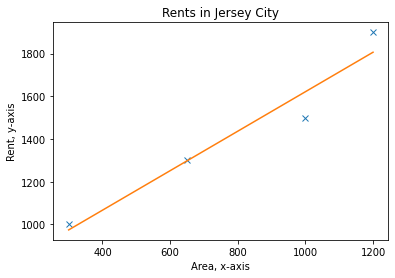

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
house_area = np.array([300, 650, 1000, 1200])
rent = np.array([ 1000, 1300, 1500, 1900 ])

plt.plot(house_area, rent, 'x')
plt.title('Rents in Jersey City')
plt.xlabel('Area, x-axis')
plt.ylabel('Rent, y-axis')
slope, intercept = np.polyfit(house_area, rent, 1)

# y = mx + c is a first degree polynomial or a linear equation
plt.plot(house_area, slope*house_area + intercept)
plt.show()

In [ ]:
# Run the cell above to get slope and intercept
predict_rent = lambda area: slope * area + intercept

predict_rent(400)

Predict rent for a house of area 990 sqft

In [ ]:
# Exercise 1
# Add your code here

Assume that there are no other factors that influence the rent other than the area of the house.
### Why is the 990 sqft more than 1000 sqft?
let's promote our equation to next degree. A second degree polynomial can be represented by the equation $$y = ax^2 + bx + c$$

In [ ]:
a_2, b_2, c_2 = # Exercise 2, your code here

plt.plot(house_area, rent, 'x')
plt.title('Rents in Jersey City')
plt.xlabel('Area, x-axis')
plt.ylabel('Rent, y-axis')

plt.plot(house_area, ___) # Exercise 3, your code here, write up the y equation in terms of house area, a_2, b_2 and c_2
plt.show()

In [ ]:
predict_rent_2 = lambda area: a_2*(area**2) + b_2*area + c_2

predict_rent_2(400)

Let's compare both the models

In [ ]:
# calculate difference between rent-predictions of 990 sqft house by model 1 and 2

The second degree model had the flexibility and predicted closer to what we are expecting. But we want to save more money and yes the model can be improved.
### As curious as Curious George?
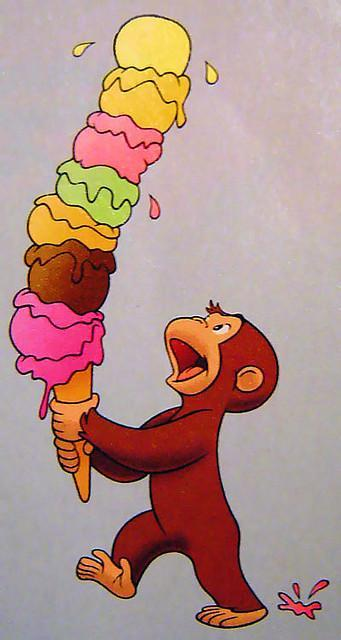

Want to go for a 3rd degree polynomial? What are you waiting for? start coding! $$y = ax^3 + bx^2 + cx + d$$

In [ ]:
# Exercise 4
# your code here
# plot and write the lambda function to predict

Thinking about taking over zillow? Not just yet.
### So far so good, the model is doing well. But how did we even get there?
We found the values for the variables $a, b,c, d$. How do we calculate those values? Let's take a deep breath and look at this flow first:

Step 1: Initialize the equation with random values for $a, b(, c, d)$<br />
Step 2: Substitute value of x and calculate y, let's consider this y value to be y_pred and actual y value to be y_actual<br />
Step 3: Repeat Step 2,calculate Y_preds for all the Ys' using their respective Xs'<br />
Step 4: Given cost function, $f(cost)$. Calculate cost using the y_preds and y_actuals <br /> 
Step 5: Is the cost 0 or closer to 0? If it is a Yes, then we found ABCDs. It it is a No, then repeat from Step 2 now by adjusting ABCD, given a $f(ABCD)$<br />

$$y = mx + c$$
$$X = [300, 650, 1000, 1200]$$
$$Y = [1000, 1300, 1500, 1900]$$

| X  | Y | Y_Pred(m=0, c=0) | Error/Cost(Y_pred-Y) |
|---|---|---:|---:|
| 300  |  1000 | 0 * 300 + 0 = 0  | 1000  |
| 650  |  1300 | 0 * 650 + 0 = 0  | 1300 |
| 1000  | 1500  | 0 * 1000 + 0 = 0 | 1500  |
| 1200  |  1900 | 0 * 1200 + 0 = 0 | 1900  |

$$MSE = \frac{1000^2 + 1300^2 + 1500^2 + 1900^2}{4} = 2137500.0$$



adjust the values of m and c using the gradient descent algorithm:

| X  | Y | Y_Pred(m=0.925, c=696.953) | Error/Cost(Y_pred-Y) |
|---|---|---:|---:|
| 300  |  1000 | 0.925 * 300 + 696.953 = 974.453  | 25.547  |
| 650  |  1300 | 0.925 * 650 + 696.953 = 1298.203  | 1.797 |
| 1000  | 1500  | 0.925 * 1000 + 696.953 = 1621.953 | -121.952  |
| 1200  |  1900 | 0.925 * 1200 + 696.953 = 1806.953 | 93.047  |

$$MSE = \frac{25.547^2 + 1.797^2 + 121.952^2 + 93.047^2}{4} = 6046.478$$

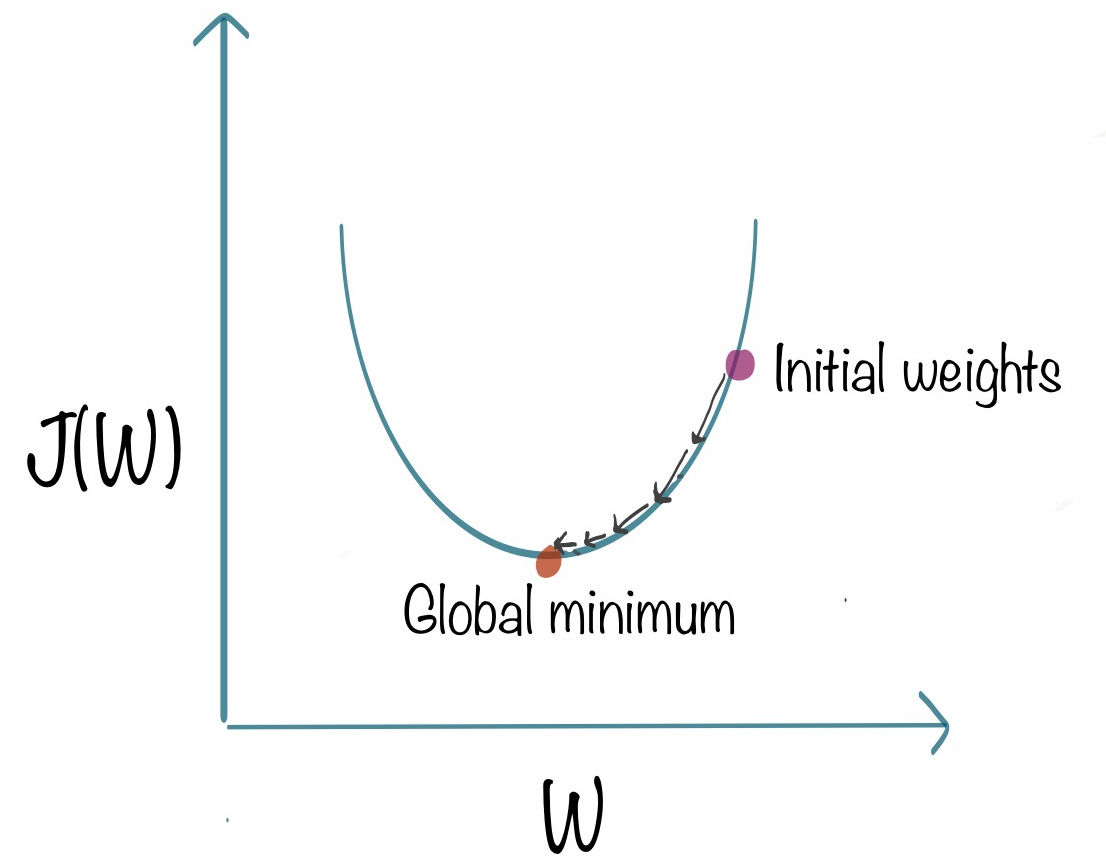

Do not worry about those functions yet. Understand the flow and familiarize yourself with it. Every complex algorithm follows a similar flow except the equations in Step 1, Step 4 and Step 5 will differ which we will look into, later.

### Cost function
$$f(cost) = {\frac{1}{n}\Sigma_{i=1}^{n}{(y_{pred} - y_{actual})^2}},$$
$y_{pred} = ax + b$<br />
$n$ is the total number of data points

In [ ]:
def cost_function(X, Y, a, b):
    """
    Parameters
    ----------
    X : list
        The input values that will be substituted to find y. 
    
    Y : list
        The values of the function at each data point.
        
    a, b: float
    
    Returns
    -------
    cost : float
        The value of the regression cost function.
    """
    predict_y = lambda x: a*x + b
    cost = 0.0
    for i in range(len(Y)):
        # Exercise 5
        # Write the equation here to calculate cost for each data point and
        # add it to cost variable
        # MSE
        
    return cost/len(Y)


cost_function(house_area.tolist(), rent.tolist(), 0.92450331, 696.95364238)
cost_function(house_area.tolist(), rent.tolist(), 1.8482632809705084, 0.0026302286012363603)
# Calculate cost for your choice of a, b, c, d
# Calculate cost for a, b, c, d obtained from np.polyfit

So close!!

We have written a function to validate our model. But without the help of polyfit, can you identify the best values for abcd where the error is 0 or close to 0.

### Introducing Gradient Descent

The idea is to reduce our error to the global minimum, by adjusting the values of variables abcd. The above curve is the cost function curve. The arrow is pointing to a negative gradient direction. At any point on the curve, we choose a negative gradient direction and how many points do we move in that direction? That will be controlled by a variable called learning_rate. Learning rate decides the rate at which you will attain global minimum. Lower learning rate means more precision but we are trading off computing time.

In [ ]:
def update_variables(X, Y, a, b, learning_rate):
    predict_y = lambda x, a, b: a*x + b
    a_deriv = b_deriv = 0
    n = len(X)
    for i in range(n):
        # Calculate partial derivatives
        # Exercise 6
        
        
                 # -2x(y - (ax + b))
        a_deriv += # transform the equation into code

                 # -2(y - (ax + b))
        b_deriv += # transform the equation into code

    # We subtract because the derivatives point in direction of steepest ascent
    a -= (a_deriv / n) * learning_rate
    b -= (b_deriv / n) * learning_rate

    return a, b

### Time to train the model

In [ ]:
def train(X, Y, a, b, learning_rate, iters):
    cost_history = []

    for i in range(iters):
        a, b = update_variables(X, Y, a, b, learning_rate)

        cost = cost_function(X, Y, a, b)
        cost_history.append(cost)

        # Log Progress
        if i % 100 == 0:
            print("iter={:d}    a={:.3f}    b={:.3f}    cost={:.2}".format(i, a, b, cost))
            
    return cost_history

### Let's use random data for once before we use the housing data

In [ ]:
random_data_cost_history = train([0.0, 1.0, 2.0, 3.0,  4.0,  5.0], [0.0, 0.8, 0.9, 0.1, -0.8, -1.0], 0.0, 0.0, 0.1, 1000)

In [ ]:
plt.plot(random_data_cost_history)
plt.show()

In [ ]:
x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])

def plot_custom(x, y, a, b, title):
    plt.plot(x, y, 'x')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)

    plt.plot(x, a*x + b)
    plt.show()
    
plot_custom(x, y, -0.177, 0, "a=-0.177, b=0")
plot_custom(x, y, -0.313, 0.743, "a=-0.313, b=0.743")
plot_custom(x, y, -0.303, 0.757, "a=-0.303, b=0.757")

In [ ]:
x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])
np.polyfit(x, y, 1)

### Train on the housing data

In [ ]:
# Exercise 7
X = [300, 650, 1000, 1200]
Y = [ 1000, 1300, 1500, 1900 ]

# Call the train function here

### Normalize the housing data



In [ ]:
X = [300, 650, 1000, 1200]
Y = [ 1000, 1300, 1500, 1900 ]

x_min, x_max, y_min, y_max = # Calculate min and max of X and Y. Assign them to respective variables

min_max_scaler_X = lambda x: (x-x_min)/(x_max-x_min)
min_max_scaler_Y = lambda y: (y-y_min)/(y_max-y_min)

X_norm = list(map(min_max_scaler_X, X))
Y_norm = list(map(min_max_scaler_Y, Y))

train(X_norm, Y_norm, 0.0, 0.0, 0.1, 400)

In [ ]:
scale_out_x = lambda x: x*(x_max-x_min) + x_min
scale_out_y = lambda y: y*(y_max-y_min) + y_min

def plot_custom(x_norm, x, y, a, b, title):
    plt.plot(x, y, 'x')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)

    plt.plot(list(map(scale_out_x, x_norm)), list(map(scale_out_y, [a*i+b for i in X_norm])))
    plt.show()
    
plot_custom(np.array(X_norm), np.array(X), np.array(Y), 0.078, 0.094, "a=0.078, b=0.094")
plot_custom(np.array(X_norm), np.array(X), np.array(Y), 0.851, 0.016, "a=0.851, b=0.016")
plot_custom(np.array(X_norm), np.array(X), np.array(Y), 0.925, -0.029, "a=0.925, b=-0.029")

The model we created in the above sections is wonderful. Let's kick start our billion dollar idea? Not just yet. But not often the output is dependant on single variable. Multiple factors contribute to the output. That brings us to 

### Multivariate linear regression
In simple words, dependant variable relies on multiple independant variables. Translate this to our house price prediction problem, now we have another factor influencing the rent, #-of-bedrooms. We can represent a general multivariate equation as,

$$y = a + b_1x_1 + b_2x_2 + b_3x_3 +...$$

x1 is the area and x2 is #-of-bedrooms in our case.

In [ ]:
def cost_function_multivariate(X, Y, a, b1, b2):
    """
    Parameters
    ----------
    X : list
        The input values that will be substituted to find y. 
    
    Y : list
        The values of the function at each data point.
        
    a, b1, b2: float
    
    Returns
    -------
    cost : float
        The value of the regression cost function.
    """
    predict_y = lambda x1, x2: a + b1*x1 + b2*x2
    cost = 0.0
    for i in range(len(Y)):
        # Exercise 8
        # Write the equation here to calculate cost for each data point and
        # add it to cost variable
        # MSE
        
    return cost/len(Y)

In [ ]:
def update_variables_multivariate(X, Y, a, b1, b2, learning_rate):
    predict_y = lambda x1, x2, a, b1, b2: a + b1*x1 + b2*x2
    a_deriv = b1_deriv = b2_deriv = 0
    n = len(X)
    for i in range(n):
        # Exercise 9 
        # Calculate partial derivatives
        
        
        
                 # -2(y - (a + b1x1 + b2x2))
        a_deriv += # transform the equation into code

                 # -2x1(y - (a + b1x1 + b2x2))
        b1_deriv += # transform the equation into code

                 # -2x2(y - (a + b1x1 + b2x2))
        b2_deriv += # transform the equation into code

    # We subtract because the derivatives point in direction of steepest ascent
    a -= (a_deriv / n) * learning_rate
    b1 -= (b1_deriv / n) * learning_rate
    b2 -= (b2_deriv / n) * learning_rate

    return a, b1, b2

In [ ]:
def multivariate_train(X, Y, a, b1, b2, learning_rate, iters):
    cost_history = []

    for i in range(iters):
        a, b1, b2 = update_variables_multivariate(X, Y, a, b1, b2, learning_rate)

        cost = cost_function_multivariate(X, Y, a, b1, b2)
        cost_history.append(cost)

        # Log Progress
        if i % 100 == 0:
            print("iter={:d}    a={:.3f}    b1={:.3f}    b2={:.3f}    cost={:.2}".format(i, a, b1, b2, cost))
            
    # return cost_history

In [ ]:
X = [[300, 0], [650, 1], [1000, 1], [1200, 2]]
X1 = [300, 650, 1000, 1200]
X2 = [0, 1, 1, 2]
Y = [1000, 1300, 1500, 1900]

x1_min, x1_max, x2_min, x2_max, y_min, y_max = min(X1), max(X1), min(X2), max(X2), min(Y), max(Y)

min_max_scaler = lambda x, xmax, xmin: (x-xmin)/(xmax-xmin)

X1_norm = # your code here
X2_norm = # your code here
Y_norm = # your code here

X_norm = [[i, j] for i, j in zip(X1_norm, X2_norm)]

X_norm, Y_norm

In [ ]:
# call multivariate train function

### Feature Engineering
Find out feature importance before you start working on the model to make the model more accurate and simple.

**Baseline Model:** Prepare target column, convert timestamp, prepare categorical variables<br />
**Catergorical encodings:** Count encoding, target encoding, catboost encoding<br />
**Feature Generation:** Creating new features, transforming features by applying log<br />
**Feature Selection:** Univariate feature selection, L1 regularization<br />

### Testing the model(test/train data, accuracy and precision)
In order to test the model we need to have additional data. So, before you build a model, divide the data into training(70%) and test data(30%). Build the model using training data and test the model on the testing data. Once you have the model ready, use the test data to predict the outputs and compare them with the actual outputs to see how they did. Depending on the nature of the data, continuous or categorical, you can use different evaulation metrics to check the performance of the model.

#### Let me introduce you to some Evaluation Metrics
For continuous data you may use Mean Square error(MSE) or Root Mean Square error (RMSE). For categorical output/classification, you may use accuracy, precision, f1-score or recall. 

#### Is accuracy important or precision in classifying?
Depending on the purpose of the application, we can use any of these metrics, accuracy, precision, f1-score or recall. 


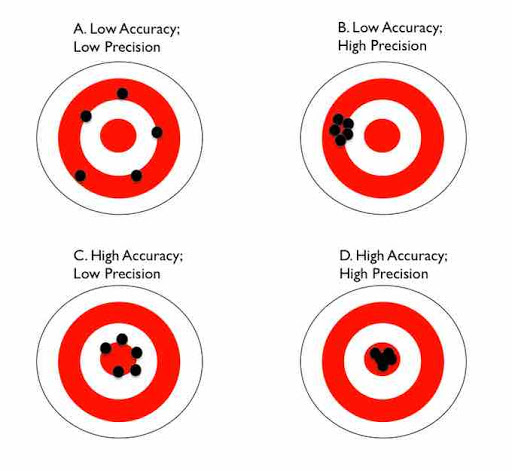

### Trees
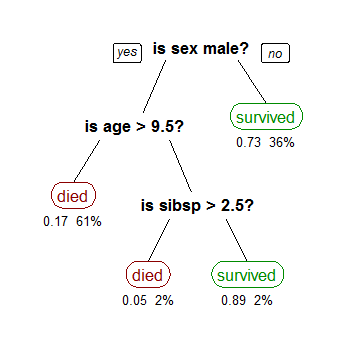

### Neural networks & Deep learning
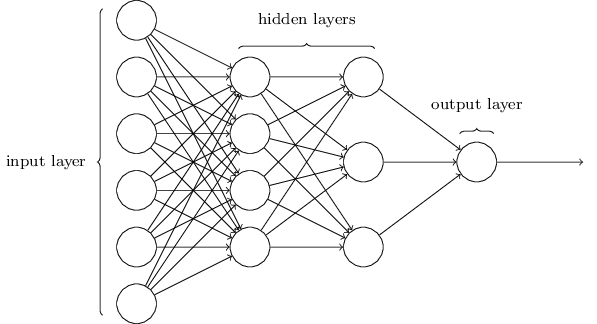

### Unsupervised ML
Machine learning technique for finding hidden patterns or intrinsic structures in data
Unsupervised learning is a type of machine learning algorithm used to draw inferences from datasets consisting of input data without labeled responses.

The most common unsupervised learning method is cluster analysis, which is used for exploratory data analysis to find hidden patterns or grouping in data. The clusters are modeled using a measure of similarity which is defined upon metrics such as Euclidean or probabilistic distance.

Common clustering algorithms include:

**Hierarchical clustering:** builds a multilevel hierarchy of clusters by creating a cluster tree <br />
**k-Means clustering:** partitions data into k distinct clusters based on distance to the centroid of a cluster <br />
**Gaussian mixture models:** models clusters as a mixture of multivariate normal density components <br />
**Self-organizing maps:** uses neural networks that learn the topology and distribution of the data <br />
**Hidden Markov models:** uses observed data to recover the sequence of states <br />
Unsupervised learning methods are used in bioinformatics for sequence analysis and genetic clustering; in data mining for sequence and pattern mining; in medical imaging for image segmentation; and in computer vision for object recognition.

### How can you decide what equation(ML algorithm) to use?
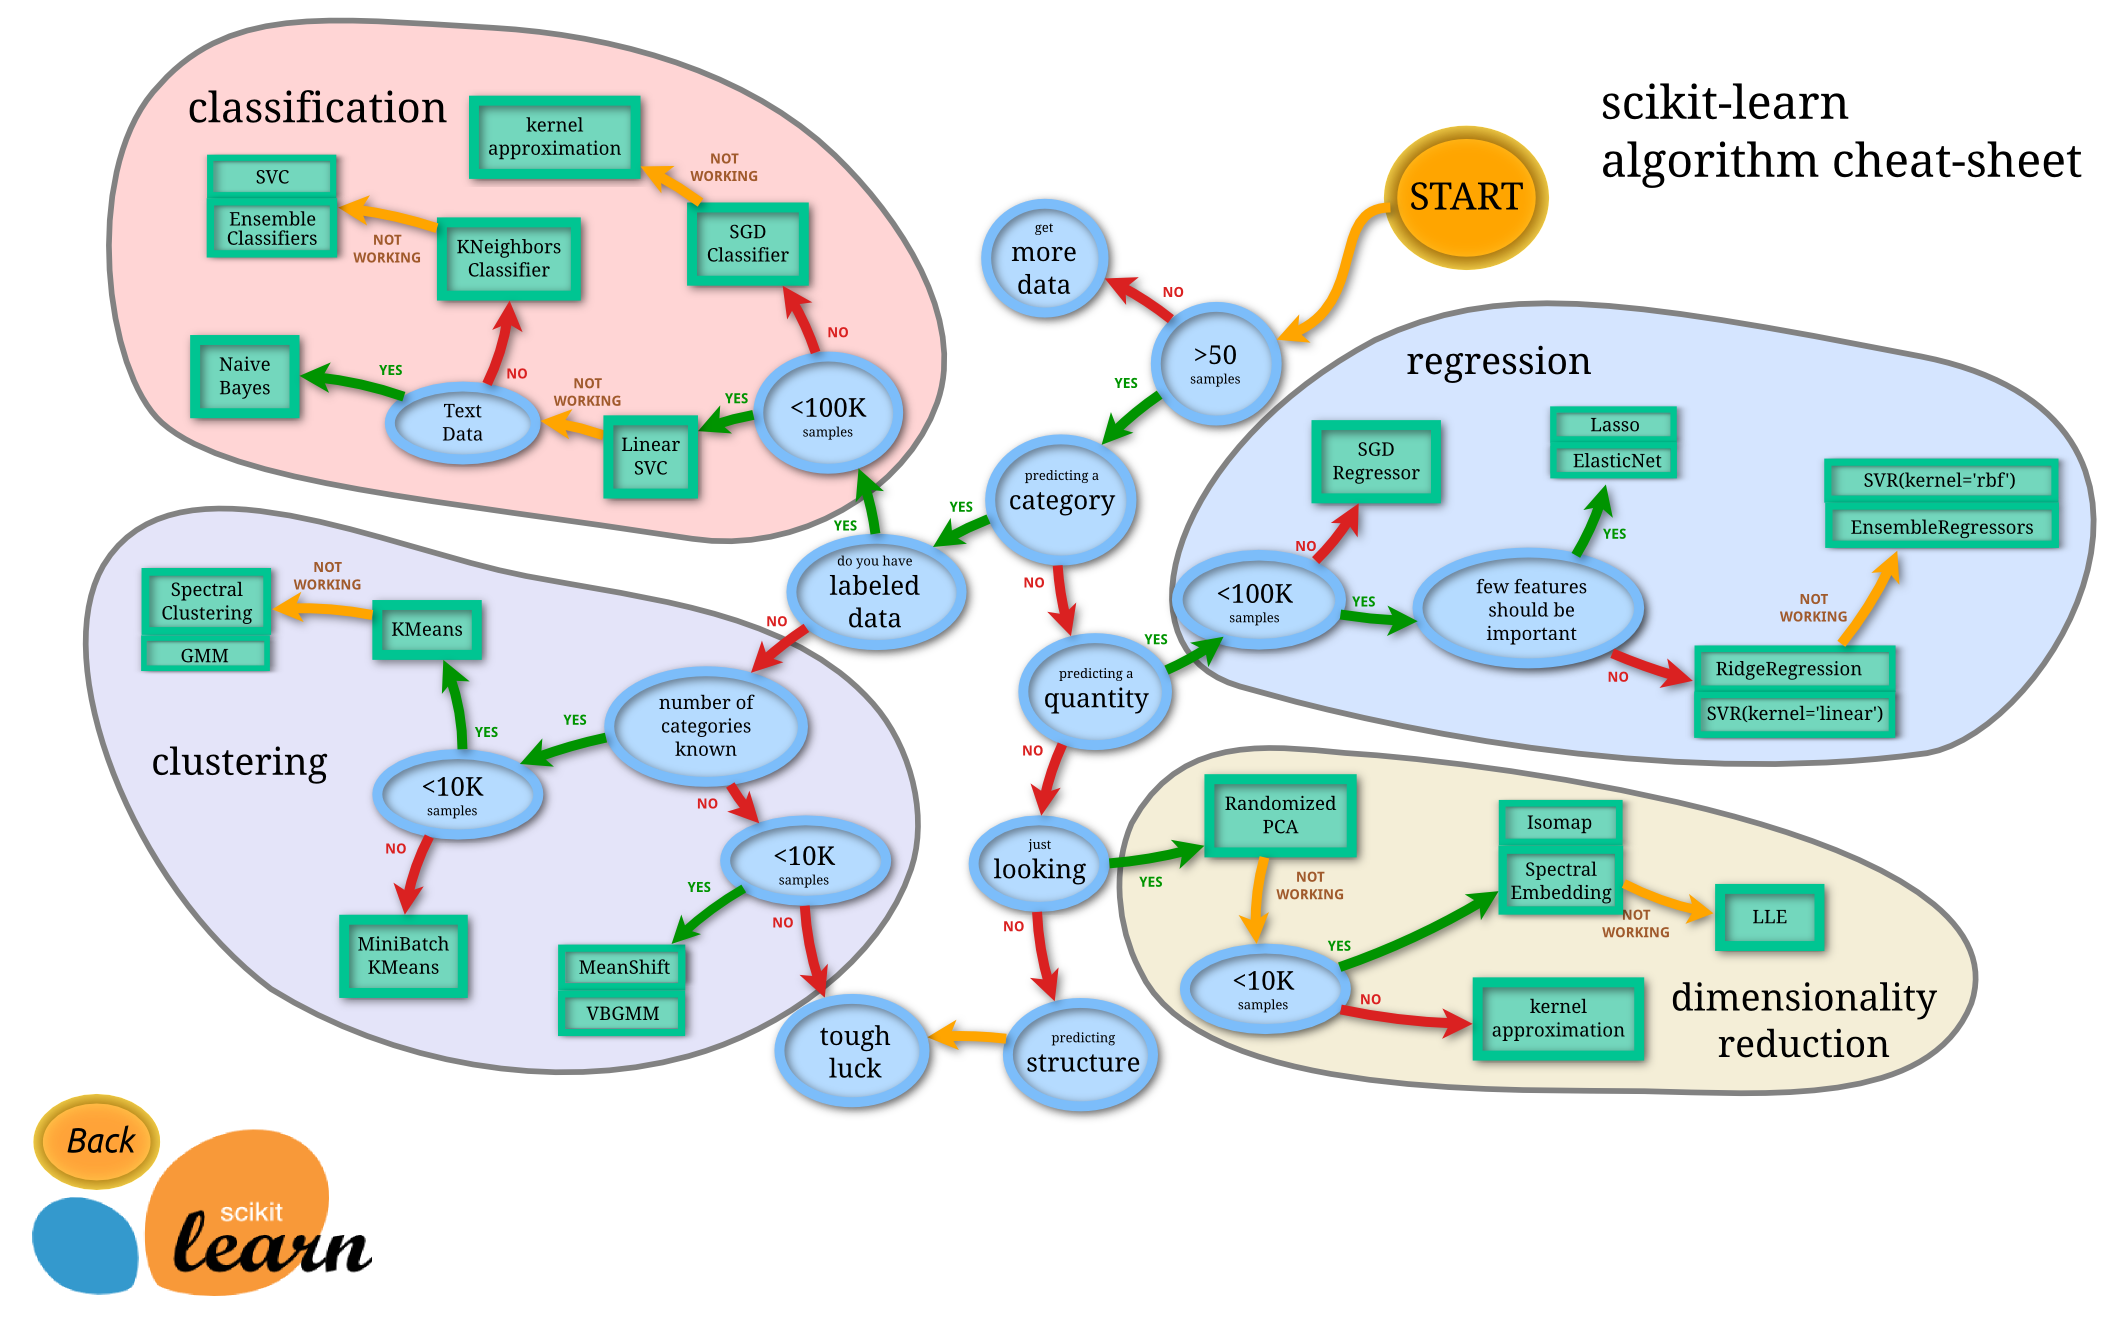

Interested in Machine Learning? then here are some starting points for you:

A recommended course to start with is the Machine Learning course by Andrew Ng, which teaches the fundamental mathematics behind machine learning and then you can pick up a problem based on your interest and background. For example, if your are into stock market and want to analyze how and what stocks are going to grow/decline, gather open source data and start analyzing it. Your model performance can be evaluated by comparing with the actual rate on that day. There will be some outliers like Tesla which might not be predicted by any algorithm but otherwise you should see interesting results for other stocks. Dig into it..